## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_raw = mouse_metadata.merge(study_results, how='left', on='Mouse ID')
mouse_metadata_raw.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
print(f"{len(mouse_metadata_raw['Mouse ID'].unique())} mice were in the test case\n")

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f"total tests\n{'--'*20}\n{mouse_metadata_raw['Mouse ID'].count()}\n")

# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = mouse_metadata_raw.loc[mouse_metadata_raw.duplicated() == True][['Mouse ID','Drug Regimen','Sex','Age_months']]
print(f"Found a duplicate test\n{'--'*20}\n{dupe_mouse}\n")

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_metadata_clean_df = mouse_metadata_raw.drop_duplicates().reset_index()

# Checking the number of mice in the clean DataFrame.
print(f"Corrected total number of tests\n{'--'*20}\n{mouse_metadata_clean_df['Mouse ID'].count()}\n")


249 mice were in the test case

total tests
----------------------------------------
1893

Found a duplicate test
----------------------------------------
    Mouse ID Drug Regimen     Sex  Age_months
909     g989     Propriva  Female          21

Corrected total number of tests
----------------------------------------
1892



## Summary Statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimens = mouse_metadata_clean_df['Drug Regimen'].unique()#['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites']
regimen_summary_df = pd.DataFrame(regimens)
regimen_summary_df.set_index(0)

for drug in regimens:
    tumor_vol = mouse_metadata_clean_df[['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']].loc[mouse_metadata_clean_df['Drug Regimen'] == drug]
    print(f"{drug}\n{'--'*90}\n\t{stats.describe(tumor_vol['Tumor Volume (mm3)'])}\n")
    #regimen_summary_df = tumor_vol
#regimen_summary_df

Ramicane
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	DescribeResult(nobs=228, minmax=(22.05012627, 47.62281636), mean=40.21674506671052, variance=23.486703952095258, skewness=-0.6835522807946888, kurtosis=0.1604857001200335)

Capomulin
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	DescribeResult(nobs=230, minmax=(23.34359787, 48.15820939), mean=40.675741141, variance=24.947764120254853, skewness=-0.8009720793107948, kurtosis=0.055594352216945975)

Infubinol
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	DescribeResult(nobs=178, minmax=(36.321345799999996, 72.2267309), mean=52.88479510

## Bar Plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie Plots

In [42]:
mice_gen_gp = mouse_metadata_clean_df[['Sex','Mouse ID']].groupby('Mouse ID')#[[,'Sex']]
gender_df = pd.DataFrame([{'Male Mice':0,'Female Mice':0}])
for mouse, group in mice_gen_gp:
    mouse_id = ''
    for row_index, row in group.iterrows():
        if mouse_id == mouse: continue
        if row['Sex'] == 'Female':
            gender_df['Female Mice'] += 1
        else:
            gender_df['Male Mice'] += 1
        mouse_id = mouse
gender=list(gender_df.columns)       
gender_df

,Male Mice,Female Mice
0,125,124


In [45]:
#pie_df = pd.DataFrame({'Count': [gender_df['Female Mice'],gender_df['Male Mice']],},index=gender)
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseplot = gender_df.plot.pie(y=gender,figsize=(5, 5))
mouseplot.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

mouseplot.set_title("Matplotlib bakery: A pie")

plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pyplot

TypeError: RangeIndex.name must be a hashable type

C:\Users\SeaLord\anaconda37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


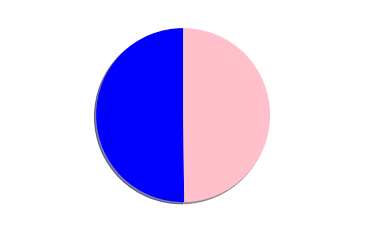

In [32]:
colors=["blue", "pink"]
plt.figure()
plt.pie(gender_df, labels=gender, colors=colors, textprops=dict(color="w"), shadow=True, startangle=90)
plt.rcParams['font.size']=16
plt.rcParams['axes.facecolor'] = 'white'
plt.title=("Test Case Mice Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
